### Reading Data

In [5]:
import pandas as pd

In [47]:
# Reading Data
df = pd.read_csv('../data/raw/NYC-Airbnb-2023.csv')
df.head()

/var/folders/x9/n61cr7z95kj3xbpqjm2_3t6m0000gn/T/ipykernel_52141/1661608246.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [48]:
df.shape

(42931, 18)

### Data Preprocessing

#### 1. Data Cleaning

##### Handle Missing Values:

In [49]:
# Identify Missing Values:
# Check for missing values
missing_data_summary = df.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['% Missing'] = (missing_data_summary['Missing Values'] / len(df)) * 100

# Display the summary
print(missing_data_summary)

                            Column  Missing Values  % Missing
0                               id               0   0.000000
1                             name              12   0.027952
2                          host_id               0   0.000000
3                        host_name               5   0.011647
4              neighbourhood_group               0   0.000000
5                    neighbourhood               0   0.000000
6                         latitude               0   0.000000
7                        longitude               0   0.000000
8                        room_type               0   0.000000
9                            price               0   0.000000
10                  minimum_nights               0   0.000000
11               number_of_reviews               0   0.000000
12                     last_review           10304  24.001304
13               reviews_per_month           10304  24.001304
14  calculated_host_listings_count               0   0.000000
15      

In [50]:
# Save the summary to a file for reference
missing_data_summary.to_csv('../reports/missing_data_summary.csv', index=False)

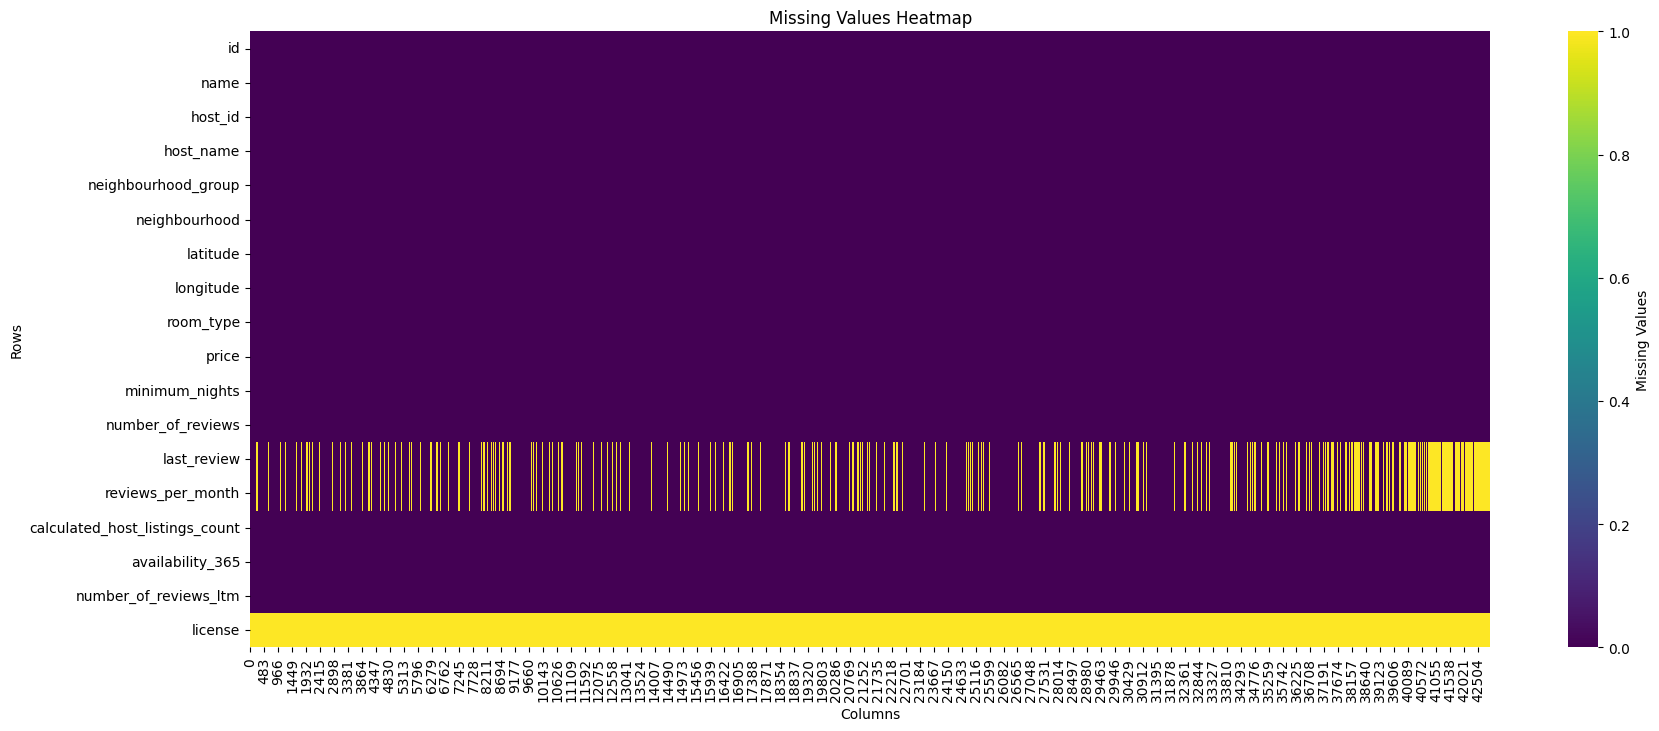

In [51]:
# Visualise missing values
import seaborn as sns
import matplotlib.pyplot as plt
# Visualise missing values
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull().T, cmap='viridis', cbar_kws={'label': 'Missing Values'})
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
# Visualize missing data using heatmap
plt.savefig('../reports/figures/missing_value_heatmap.png')
plt.show()

a.   Removal:
Remove rows with missing values if imputation is not feasible

In [89]:
# Remove rows/columns with missing values
# license column (~99.99% missing)
df.drop(columns=['license'], inplace=True)

b.    Flagging:

In [53]:
# Create flag columns
df['name_missing'] = df['name'].isna().astype(int)
df['host_name_missing'] = df['host_name'].isna().astype(int)

In [54]:
# verify flagging host_name
df.loc[(df['host_name_missing'] == 1),['host_name','host_name_missing']]

,host_name,host_name_missing
2860,NaN,1
3128,NaN,1
4012,NaN,1
4347,NaN,1
4732,NaN,1


In [55]:
# verify flgging name_missing
df.loc[(df['name_missing'] == 1),['name','name_missing']]

,name,name_missing
2734,NaN,1
2887,NaN,1
2969,NaN,1
3157,NaN,1
4240,NaN,1
5842,NaN,1
6242,NaN,1
6556,NaN,1
6589,NaN,1
7670,NaN,1


In [56]:
df['name_missing'].value_counts()

name_missing
0    42919
1       12
Name: count, dtype: int64

In [57]:
df['host_name_missing'].value_counts()

host_name_missing
0    42926
1        5
Name: count, dtype: int64

In [58]:
# Create flag columns
df['last_review_missing'] = df['last_review'].isna().astype(int)
df['reviews_per_month_missing'] = df['reviews_per_month'].isna().astype(int)

In [59]:
# verify flgging last_review_missing
df.loc[(df['last_review_missing'] == 1),['last_review','last_review_missing']]

,last_review,last_review_missing
15,NaN,1
47,NaN,1
88,NaN,1
101,NaN,1
114,NaN,1
...,...,...
42926,NaN,1
42927,NaN,1
42928,NaN,1
42929,NaN,1


In [60]:
# verify flgging last_review_missing
df['last_review_missing'].value_counts()

last_review_missing
0    32627
1    10304
Name: count, dtype: int64

In [61]:
# verify flgging reviews_per_month_missing
df.loc[(df['reviews_per_month_missing'] == 1),['reviews_per_month','reviews_per_month_missing']]

,reviews_per_month,reviews_per_month_missing
15,NaN,1
47,NaN,1
88,NaN,1
101,NaN,1
114,NaN,1
...,...,...
42926,NaN,1
42927,NaN,1
42928,NaN,1
42929,NaN,1


In [62]:
# verify flgging reviews_per_month_missing
df['reviews_per_month_missing'].value_counts()

reviews_per_month_missing
0    32627
1    10304
Name: count, dtype: int64

c. Imputation

In [63]:
# Imputing both Categorical columns name & host_name with 'Unknown'
# name and host_name columns (~0.03% and ~0.01% missing)
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

In [77]:
# Impute last_review with a Nat(Not a Time) date and reviews_per_month with 0.0
df['last_review'] = df['last_review'].fillna(pd.NaT)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

##### Correct Errors

1. Fix Inconsistencies:
Standardize categorical values.

In [65]:
###########################################################################
# Standardize column names
###########################################################################
df.columns = (
    df.columns
    .str.lower()                  # Convert to lowercase
    .str.replace(' ', '_')        # Replace spaces with underscores
    .str.replace(r'[^\w\s]', '')  # Remove special characters
)

In [66]:

###########################################################################
# # Ensuring column names are unique
###########################################################################
# Step 1: Get the total number of columns
total_columns = len(df.columns)

# # Step 2: Get the unique column names
unique_columns = df.columns.unique()

# Step 3: Check if the shape of total and unique column names are the same
if total_columns == len(unique_columns):
    print("No duplication in column names")
else:
    print("Duplication found in column names")
    
    # Step 4: Apply the duplicate() method to deduplicate column names
    # will return original names if no duplication otherwise column_name_dup1, column_name_dup2 etc for duplicated
    # column names
    df.columns = df.columns.duplicate(suffix='_dup')

    print("Column names after deduplication:")
    print(df.columns)


No duplication in column names


In [67]:
###########################################################################
#  Remove Leading/Trailing Whitespace from String Columns 
###########################################################################

# Define string columns
string_columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

# Remove leading/trailing whitespace from string columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())


In [68]:
# Before applying correction:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,0.888416,24.054809,140.262211,7.736507,0.000280,0.000116,0.240013,0.240013
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,1.638122,80.867958,142.001486,18.290256,0.016717,0.010791,0.427096,0.427096
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,0.240000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,1.170000,4.000000,289.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Validate and Correct Numerical Values:

# Correct Negative Values for price: Ensure the price is non-negative, as a negative price doesn't make sense.
df['price'] = df['price'].apply(lambda x: max(x, 0))

# Latitude and Longitude Validation: Ensure latitude is between -90 and 90 and longitude is between -180 and 180.
# Latitude correction
df['latitude'] = df['latitude'].apply(lambda x: min(max(x, -90), 90))

# Longitude correction
df['longitude'] = df['longitude'].apply(lambda x: min(max(x, -180), 180))

# Ensure minimum_nights is a Positive Integer:
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: max(x, 1))

# Ensure availability_365 is within 0 to 365:
df['availability_365'] = df['availability_365'].apply(lambda x: min(max(x, 0), 365))

# Ensure number_of_reviews, calculated_host_listings_count, and number_of_reviews_ltm are Non-negative:
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: max(x, 0))
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].apply(lambda x: max(x, 0))
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].apply(lambda x: max(x, 0))


In [71]:
# After correction applied:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,0.888416,24.054809,140.262211,7.736507,0.000280,0.000116,0.240013,0.240013
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,1.638122,80.867958,142.001486,18.290256,0.016717,0.010791,0.427096,0.427096
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,0.240000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,1.170000,4.000000,289.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000,1.000000,1.000000,1.000000,1.000000


##### Remove Duplicates

1. Identify and Remove Duplicates:

In [73]:
###########################################################################
# Check for duplicates
# Find and remove duplicate rows in the DataFrame.
###########################################################################

# Find duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify removal of duplicates
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


##### Verify Data Quality

a. Re-check Missing Values:

In [76]:
# Verify there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
name_missing                          0
host_name_missing                     0
last_review_missing                   0
reviews_per_month_missing             0
dtype: int64


Note : Missing values in last_review   10304 are due to imputation of pd.NaT i.e Not a Time values present.

b. Verify Data Types and Consistency:

In [80]:
###########################################################################
# Check data types
###########################################################################

print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
name_missing                        int64
host_name_missing                   int64
last_review_missing                 int64
reviews_per_month_missing           int64
dtype: object


In [86]:
# Convert date time 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify the data type
print(df['last_review'].dtype)

# Optionally, check for any NaT values to ensure the conversion was successful
print(df['last_review'].isna().sum())


datetime64[ns]
10304


In [87]:
# Convert integer columns to int64 (though they are likely already int64)
integer_columns = [
    'id', 'host_id', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365', 
    'number_of_reviews_ltm', 'name_missing', 'host_name_missing', 
    'last_review_missing', 'reviews_per_month_missing'
]

# Convert these columns explicitly to int64
for col in integer_columns:
    df[col] = df[col].astype('int64')

# Convert float columns to float64
float_columns = [ 'price', 'latitude', 'longitude', 'reviews_per_month']

# Convert these columns explicitly to float64
for col in float_columns:
    df[col] = df[col].astype('float64')

# Verify the data types after conversion
print(df.dtypes)


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
name_missing                               int64
host_name_missing                          int64
last_review_missing                        int64
reviews_per_month_mi

##### Save Cleaned Data

1. Save the Cleaned Data

In [94]:
# Save the cleaned dataset
df.to_csv('../data/processed/cleaned_NYC-Airbnb-2023.csv', index=False)

#### 2.	Data Transformation

##### 1. Normalize / Scale Numerical Features

###